In [18]:
# DataFrames と　CSV をインストールする
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add()

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [19]:
using DataFrames, CSV, Dates, Plots
include("DelayCoordinate.jl")

# CSVファイルを読み込む
df = CSV.read("../data/ex_rate/JPY_USD_2000-01-01_to_2022-12-30.csv", DataFrame)

Row,Date,Open,High,Low,Close,Adj Close,Volume,Cur
,String15,String15,String15,String15,String15,String15,String7,String3
1,1/3/2000,0.009797,0.009871,0.009678,0.009834,0.009834,0,JPY
2,1/4/2000,0.009839,0.009855,0.009679,0.009696,0.009696,0,JPY
3,1/5/2000,0.009696,0.009732,0.009571,0.009607,0.009607,0,JPY
4,1/6/2000,0.009607,0.009625,0.009473,0.009503,0.009503,0,JPY
5,1/7/2000,0.0095,0.009539,0.009445,0.009494,0.009494,0,JPY
6,1/10/2000,0.009515,0.00959,0.009447,0.009509,0.009509,0,JPY
7,1/11/2000,0.00951,0.009519,0.009406,0.009432,0.009432,0,JPY
8,1/12/2000,0.009433,0.00948,0.009319,0.00946,0.00946,0,JPY
9,1/13/2000,0.009459,0.009489,0.009414,0.009432,0.009432,0,JPY


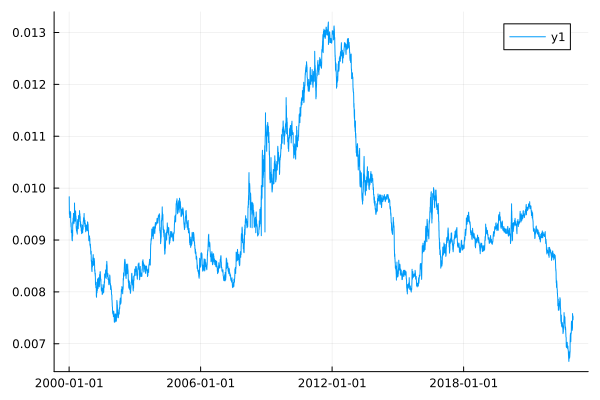

In [7]:
# 欠損値を削除
df = df[df.Close.!="null", :]

# Date列，Close列を取り出す
date = df.Date
close = df.Close

#　Date列(month/day/year)を日付型に変換，Close列を数値型に変換
date = Date.(date, "mm/dd/yyyy")
close = parse.(Float64, close)

plot(date, close)

In [17]:
delay, dim = optimize_embedding_parameters(close, 10000, 10000, "ami")

UndefVarError: UndefVarError: `normalize` not defined

┌ Warning: attempting to remove probably stale pidfile
│   path = /Users/hibiki/.jlassetregistry.lock
└ @ Pidfile /Users/hibiki/.julia/packages/Pidfile/DDu3M/src/Pidfile.jl:260


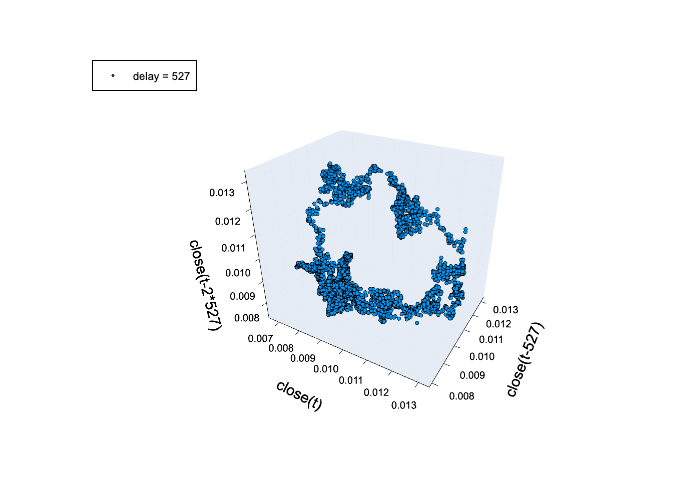

In [14]:
# delay = 500 # 適当なcloseの時間遅れ(日)
# dim = 3 # 適当な埋め込み次元

# 時間遅れのデータを作成
plotlyjs()
data = zeros(length(close) - (dim - 1) * delay, dim)
for i in 1:dim
	data[:, i] = close[(dim-i)*delay+1:end-(i-1)*delay]
end
# プロット
if dim == 2
	scatter(data[:, 1], data[:, 2], markersize = 1, label = "delay = $delay", xlabel = "close(t)", ylabel = "close(t-$delay)", legend = :topleft)
else
	scatter(data[:, 1], data[:, 2], data[:, 3], markersize = 1, label = "delay = $delay", xlabel = "close(t)", ylabel = "close(t-$delay)", zlabel = "close(t-2*$delay)", legend = :topleft)
end


# フィルタリング

## 移動平均

# 主成分分析

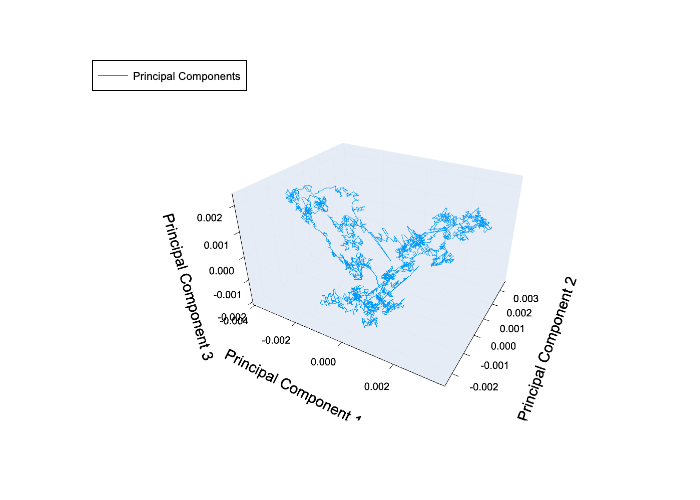

In [29]:
using LinearAlgebra
# データの平均を引く
data_centered = data .- mean(data, dims=1)

# 共分散行列を計算
cov_matrix = cov(data_centered)

# 固有値と固有ベクトルを計算
eigenvalues, eigenvectors = eigen(cov_matrix)

# 固有値の降順に並べ替え
sorted_indices = sortperm(eigenvalues, rev=true)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# 寄与率を計算
explained_variance = eigenvalues / sum(eigenvalues)

# 主成分得点を計算
principal_components = data_centered * eigenvectors

# 結果を表示
println("Explained Variance Ratios: ", explained_variance)
println("Principal Components: ", principal_components)

# 主成分をプロット
plot(principal_components[:, 1], principal_components[:, 2], principal_components[:, 3], markersize = 1, label = "Principal Components", xlabel = "Principal Component 1", ylabel = "Principal Component 2", zlabel = "Principal Component 3", legend = :topleft)
